In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

In [18]:
df = [pd.read_csv(csv) for csv in sorted(glob('states[0-9].csv'))]

In [31]:
us_census = pd.concat(df)

In [32]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


In [33]:
us_census.drop('Unnamed: 0', axis=1, inplace=True)
us_census.reset_index(drop=True, inplace=True)

In [34]:
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


In [35]:
us_census.columns

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'GenderPop'],
      dtype='object')

In [36]:
us_census.Income = us_census.Income.str.replace('$','').astype(float)
us_census.dtypes

<ipython-input-36-2d3c667702f8>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  us_census.Income = us_census.Income.str.replace('$','').astype(float)


State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income       float64
GenderPop     object
dtype: object

In [37]:
us_census.GenderPop.head()

0      2341093M_2489527F
1        384160M_349215F
2      3299088M_3342840F
3      1451913M_1506295F
4    19087135M_19334329F
Name: GenderPop, dtype: object

In [38]:
genderpop = us_census.GenderPop.replace(['M','F'],'', regex=True).str.split('_')
men, women = genderpop.apply(lambda x: x[0]), genderpop.apply(lambda x: x[1])
us_census['Men'], us_census['Women'] = [men, women]

In [39]:
us_census.Men, us_census.Women = pd.to_numeric(us_census.Men), pd.to_numeric(us_census.Women)
us_census[['Men', 'Women']]

,Men,Women
0,2341093,2489527.0
1,384160,349215.0
2,3299088,3342840.0
3,1451913,1506295.0
4,19087135,19334329.0
5,2648667,2630239.0
6,2648667,2630239.0
7,1751607,1841615.0
8,448413,478041.0
9,306674,340810.0


In [40]:
us_census.Women.fillna(us_census.TotalPop - us_census.Men, inplace=True)
us_census[['Men', 'Women']]

,Men,Women
0,2341093,2489527.0
1,384160,349215.0
2,3299088,3342840.0
3,1451913,1506295.0
4,19087135,19334329.0
5,2648667,2630239.0
6,2648667,2630239.0
7,1751607,1841615.0
8,448413,478041.0
9,306674,340810.0


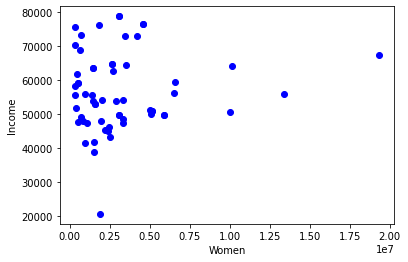

In [41]:
plt.scatter(us_census.Women,us_census.Income, color=['blue'])
plt.xlabel('Women')
plt.ylabel('Income')
plt.show()

In [42]:
us_census.duplicated().value_counts()

False    51
True      9
dtype: int64

In [43]:
us_census.drop_duplicates(inplace=True)
us_census.reset_index(drop=True,inplace=True)
us_census.duplicated().value_counts()

False    51
dtype: int64

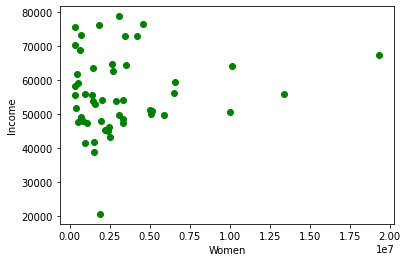

In [44]:
plt.scatter(us_census.Women,us_census.Income,color=['green'])
plt.xlabel('Women')
plt.ylabel('Income')
plt.show()

In [45]:
us_census.iloc[:,2:8].head()

,Hispanic,White,Black,Native,Asian,Pacific
0,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%
1,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%
2,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%
3,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%
4,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%


In [46]:
us_census.iloc[:, 2:8] = us_census.iloc[:, 2:8].replace('%','', regex=True).astype(float)

In [47]:
us_census.Pacific.loc[us_census.Pacific.isnull() == True]

5    NaN
7    NaN
16   NaN
34   NaN
Name: Pacific, dtype: float64

In [48]:
us_census.Pacific.fillna(us_census.Pacific.mean(), inplace=True)
us_census.Pacific.loc[us_census.Pacific.isnull() == True]

Series([], Name: Pacific, dtype: float64)

In [49]:
def histogram(race,color):
    plt.hist(us_census[race],ec='black',color=color)
    plt.title(race+"Race")
    plt.ylabel('Frequence')
    plt.xlabel('percentage of population')
    plt.show()

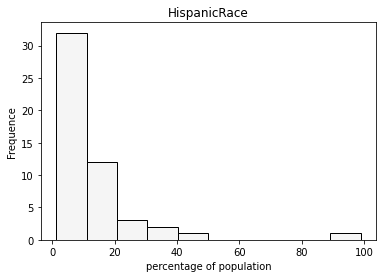

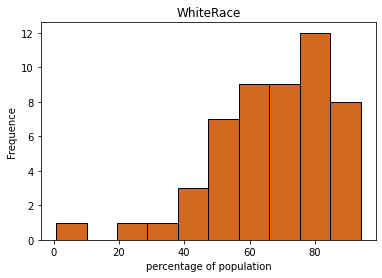

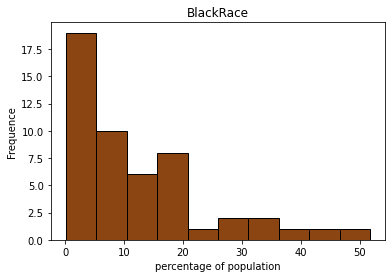

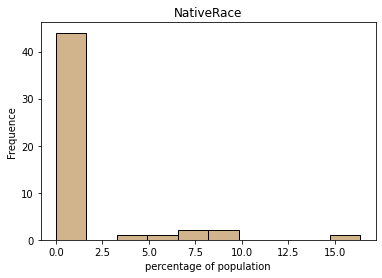

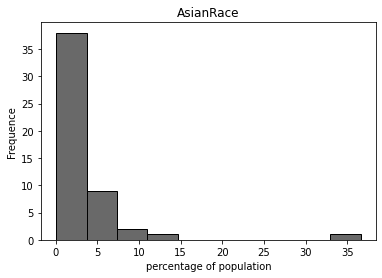

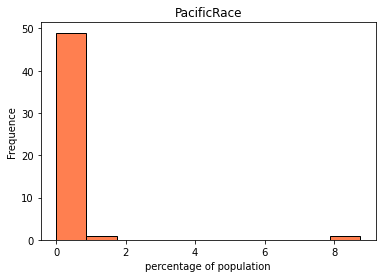

In [51]:
histogram('Hispanic', 'whitesmoke')

histogram('White', 'chocolate')

histogram('Black', 'saddlebrown')

histogram('Native', 'tan')

histogram('Asian', 'dimgrey')

histogram('Pacific', 'coral')

In [55]:
data = pd.read_csv('inventory.csv')

In [56]:
data.head()

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99


In [57]:
staten_island = data.iloc[:10,:]
staten_island

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


In [59]:
product_request = staten_island["product_description"]
product_request

0                         daisy
1                    calla lily
2                        tomato
3                          rake
4                   wheelbarrow
5                         spade
6                 insect killer
7                   weed killer
8    20 inch terracotta planter
9        8 inch plastic planter
Name: product_description, dtype: object

In [60]:
seed_request = data.loc[(data['location'] == 'Brooklyn') & ( data['product_type'] == 'seeds')]
seed_request

,location,product_type,product_description,quantity,price
10,Brooklyn,seeds,daisy,50,6.99
11,Brooklyn,seeds,calla lily,0,19.99
12,Brooklyn,seeds,tomato,0,13.99


In [61]:
data['in_stock'] = data.quantity != 0
data.head(10)

,location,product_type,product_description,quantity,price,in_stock
0,Staten Island,seeds,daisy,4,6.99,True
1,Staten Island,seeds,calla lily,46,19.99,True
2,Staten Island,seeds,tomato,85,13.99,True
3,Staten Island,garden tools,rake,4,13.99,True
4,Staten Island,garden tools,wheelbarrow,0,89.99,False
5,Staten Island,garden tools,spade,93,19.99,True
6,Staten Island,pest_control,insect killer,74,12.99,True
7,Staten Island,pest_control,weed killer,8,23.99,True
8,Staten Island,planter,20 inch terracotta planter,0,17.99,False
9,Staten Island,planter,8 inch plastic planter,53,3.99,True


In [62]:
data['total_value'] = data.price * data.quantity
data.head(10)

,location,product_type,product_description,quantity,price,in_stock,total_value
0,Staten Island,seeds,daisy,4,6.99,True,27.96
1,Staten Island,seeds,calla lily,46,19.99,True,919.54
2,Staten Island,seeds,tomato,85,13.99,True,1189.15
3,Staten Island,garden tools,rake,4,13.99,True,55.96
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00
5,Staten Island,garden tools,spade,93,19.99,True,1859.07
6,Staten Island,pest_control,insect killer,74,12.99,True,961.26
7,Staten Island,pest_control,weed killer,8,23.99,True,191.92
8,Staten Island,planter,20 inch terracotta planter,0,17.99,False,0.00
9,Staten Island,planter,8 inch plastic planter,53,3.99,True,211.47


In [63]:
combine_lambda = lambda row:'{} - {}'.format(row.product_type, row.product_description)
data['full_description'] = data.apply(combine_lambda, axis=1)
data

,location,product_type,product_description,quantity,price,in_stock,total_value,full_description
0,Staten Island,seeds,daisy,4,6.99,True,27.96,seeds - daisy
1,Staten Island,seeds,calla lily,46,19.99,True,919.54,seeds - calla lily
2,Staten Island,seeds,tomato,85,13.99,True,1189.15,seeds - tomato
3,Staten Island,garden tools,rake,4,13.99,True,55.96,garden tools - rake
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00,garden tools - wheelbarrow
5,Staten Island,garden tools,spade,93,19.99,True,1859.07,garden tools - spade
6,Staten Island,pest_control,insect killer,74,12.99,True,961.26,pest_control - insect killer
7,Staten Island,pest_control,weed killer,8,23.99,True,191.92,pest_control - weed killer
8,Staten Island,planter,20 inch terracotta planter,0,17.99,False,0.00,planter - 20 inch terracotta planter
9,Staten Island,planter,8 inch plastic planter,53,3.99,True,211.47,planter - 8 inch plastic planter
